

# Analise de Dados - Preditiva
Analise de dados inicial by Iasmin Marques sobre a Síndrome Respiratória Aguda Grave (SRAG).

## Dados

* Link da fonte de dados: https://opendatasus.saude.gov.br/dataset/srag-2021-a-2024


* Link do repositorio do github
https://github.com/iasminimp/srag_tcc



In [44]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Carregar os dados
df = pd.read_csv("INFLUD24-03-02-2025.csv", sep=";")
#imprimindo df
df

<ipython-input-44-aa036deb6b50>:10: DtypeWarning: Columns (15,53,59,62,91,93,105,120,145,148,171,175,176,178) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("INFLUD24-03-02-2025.csv", sep=";")


,DT_NOTIFIC,SEM_NOT,DT_SIN_PRI,SEM_PRI,SG_UF_NOT,ID_REGIONA,CO_REGIONA,ID_MUNICIP,CO_MUN_NOT,ID_UNIDADE,...,VG_REINF,REINF,FAB_ADIC,LOT_RE_BI,FAB_RE_BI,DOSE_ADIC,DOS_RE_BI,LOTE_ADIC,TABAG,CASO_SRAG
0,04/01/2024,1,04/01/2024,1,CE,1 CRES FORTALEZA,1519.0,FORTALEZA,230440,SOPAI HOSPITAL INFANTIL,...,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
1,15/01/2024,3,31/12/2023,1,BA,NUCLEO REGIONAL DE SAUDE LESTE,1380.0,SALVADOR,292740,CARDIO PULMONAR DA BAHIA,...,NaN,2,NaN,GF9673,103 - COVID-19 PFIZER - COMIRNATY BIVALENTE,NaN,03/03/2023,NaN,NaN,1.0
2,15/01/2024,3,10/01/2024,2,PB,I NRS JOAO PESSOA,1377.0,JOAO PESSOA,250750,HOSPITAL DE EMERGENCIA E TRAUMA SENADOR HUMBER...,...,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
3,11/01/2024,2,04/01/2024,1,GO,SUDOESTE II,1800.0,JATAI,521190,HOSPITAL PADRE TIAGO NA PROVIDENCIA DE DEUS,...,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
4,16/01/2024,3,14/01/2024,3,BA,NUCLEO REGIONAL DE SAUDE LESTE,1380.0,SALVADOR,292740,PA MARIA DA CONCEICAO SANTIAGO IMBASSAY,...,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
266425,27/11/2024,48,23/11/2024,47,MG,BELO HORIZONTE,1449.0,BELO HORIZONTE,310620,HOSPITAL INFANTIL JOAO PAULO II,...,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
266426,06/12/2024,49,04/12/2024,49,MG,GOVERNADOR VALADARES,1471.0,GOVERNADOR VALADARES,312770,HOSPITAL MUNICIPAL,...,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
266427,16/12/2024,51,13/12/2024,50,SP,GVE XXXI SOROCABA,1353.0,ITU,352390,VIGILANCIA EPIDEMIOLOGICA,...,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
266428,05/12/2024,49,04/12/2024,49,DF,NaN,NaN,BRASILIA,530010,HOSPITAL AGUAS CLARAS,...,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0


In [45]:
# Exibir as primeiras linhas
print("🔍 Primeiras 5 linhas do dataset:")
display(df.head())

🔍 Primeiras 5 linhas do dataset:


,DT_NOTIFIC,SEM_NOT,DT_SIN_PRI,SEM_PRI,SG_UF_NOT,ID_REGIONA,CO_REGIONA,ID_MUNICIP,CO_MUN_NOT,ID_UNIDADE,...,VG_REINF,REINF,FAB_ADIC,LOT_RE_BI,FAB_RE_BI,DOSE_ADIC,DOS_RE_BI,LOTE_ADIC,TABAG,CASO_SRAG
0,04/01/2024,1,04/01/2024,1,CE,1 CRES FORTALEZA,1519.0,FORTALEZA,230440,SOPAI HOSPITAL INFANTIL,...,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
1,15/01/2024,3,31/12/2023,1,BA,NUCLEO REGIONAL DE SAUDE LESTE,1380.0,SALVADOR,292740,CARDIO PULMONAR DA BAHIA,...,NaN,2,NaN,GF9673,103 - COVID-19 PFIZER - COMIRNATY BIVALENTE,NaN,03/03/2023,NaN,NaN,1.0
2,15/01/2024,3,10/01/2024,2,PB,I NRS JOAO PESSOA,1377.0,JOAO PESSOA,250750,HOSPITAL DE EMERGENCIA E TRAUMA SENADOR HUMBER...,...,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
3,11/01/2024,2,04/01/2024,1,GO,SUDOESTE II,1800.0,JATAI,521190,HOSPITAL PADRE TIAGO NA PROVIDENCIA DE DEUS,...,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
4,16/01/2024,3,14/01/2024,3,BA,NUCLEO REGIONAL DE SAUDE LESTE,1380.0,SALVADOR,292740,PA MARIA DA CONCEICAO SANTIAGO IMBASSAY,...,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0


In [46]:
# Informações gerais
print("\n📊 Informações sobre os dados:")
df.info()


📊 Informações sobre os dados:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266430 entries, 0 to 266429
Columns: 191 entries, DT_NOTIFIC to CASO_SRAG
dtypes: float64(103), int64(13), object(75)
memory usage: 388.2+ MB


In [47]:
# Estatísticas básicas
print("\n📈 Estatísticas descritivas:")
display(df.describe())


📈 Estatísticas descritivas:


,SEM_NOT,SEM_PRI,CO_REGIONA,CO_MUN_NOT,CO_UNI_NOT,NU_IDADE_N,TP_IDADE,CS_GESTANT,CS_RACA,CS_ESCOL_N,...,DT_TRT_COV,CO_DETEC,VG_OMS,VG_MET,VG_DTRES,VG_ENC,VG_REINF,REINF,TABAG,CASO_SRAG
count,266430.000000,266430.000000,233637.000000,266430.000000,2.664300e+05,266430.000000,266430.000000,266430.000000,266430.000000,165984.000000,...,0.0,172604.000000,586.000000,2475.000000,0.0,2520.000000,0.0,266430.0,0.0,237349.000000
mean,25.982055,25.559190,1581.931548,346352.018305,3.235777e+06,30.815197,2.735548,5.833161,3.218376,5.038094,...,NaN,2.451560,3.911263,2.778586,NaN,2.994841,NaN,2.0,NaN,0.750894
std,13.608225,13.638386,694.283593,92791.240586,2.421761e+06,32.655731,0.472243,0.667792,2.472529,3.385197,...,NaN,1.799134,2.998970,0.676629,NaN,0.936434,NaN,0.0,NaN,0.432496
min,1.000000,1.000000,1331.000000,110002.000000,3.960000e+02,-4.000000,1.000000,0.000000,1.000000,0.000000,...,NaN,1.000000,1.000000,1.000000,NaN,1.000000,NaN,2.0,NaN,0.000000
25%,15.000000,15.000000,1352.000000,310620.000000,2.082128e+06,3.000000,2.000000,6.000000,1.000000,2.000000,...,NaN,2.000000,1.000000,3.000000,NaN,3.000000,NaN,2.0,NaN,1.000000
50%,25.000000,24.000000,1449.000000,351907.000000,2.487756e+06,10.000000,3.000000,6.000000,4.000000,5.000000,...,NaN,2.000000,1.000000,3.000000,NaN,3.000000,NaN,2.0,NaN,1.000000
75%,37.000000,37.000000,1533.000000,411150.000000,3.625087e+06,65.000000,3.000000,6.000000,4.000000,9.000000,...,NaN,2.000000,7.000000,3.000000,NaN,3.000000,NaN,2.0,NaN,1.000000
max,52.000000,52.000000,6256.000000,530010.000000,9.997091e+06,124.000000,3.000000,9.000000,9.000000,9.000000,...,NaN,9.000000,7.000000,4.000000,NaN,5.000000,NaN,2.0,NaN,1.000000


In [48]:
# Verificar valores nulos
print("\n🔍 Valores ausentes:")
display(df.isnull().sum())


🔍 Valores ausentes:


,0
DT_NOTIFIC,0
SEM_NOT,0
DT_SIN_PRI,0
SEM_PRI,0
SG_UF_NOT,0
...,...
DOSE_ADIC,261295
DOS_RE_BI,240456
LOTE_ADIC,261409
TABAG,266430


In [50]:
# Verificar se as colunas existem no DataFrame
print(df.columns)  # Imprime todas as colunas para verificar os nomes

Index(['DT_NOTIFIC', 'SEM_NOT', 'DT_SIN_PRI', 'SEM_PRI', 'SG_UF_NOT',
       'ID_REGIONA', 'CO_REGIONA', 'ID_MUNICIP', 'CO_MUN_NOT', 'ID_UNIDADE',
       ...
       'VG_REINF', 'REINF', 'FAB_ADIC', 'LOT_RE_BI', 'FAB_RE_BI', 'DOSE_ADIC',
       'DOS_RE_BI', 'LOTE_ADIC', 'TABAG', 'CASO_SRAG'],
      dtype='object', length=191)


## Visualizar algumas distribuições

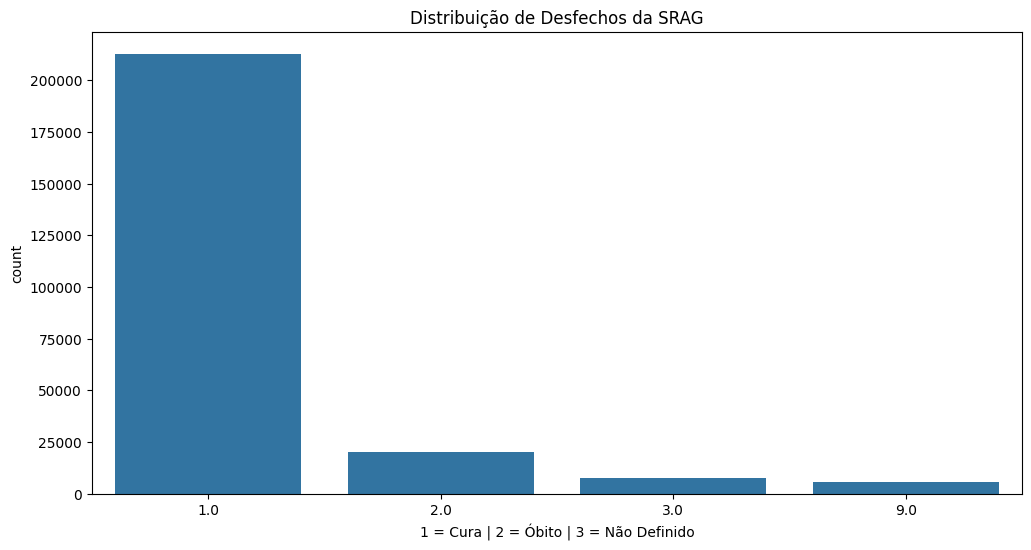

In [51]:
plt.figure(figsize=(12,6))

# Exemplo: Distribuição de óbitos (caso tenha essa coluna no dataset)
if 'EVOLUCAO' in df.columns:
    sns.countplot(x=df['EVOLUCAO'])
    plt.title("Distribuição de Desfechos da SRAG")
    plt.xlabel("1 = Cura | 2 = Óbito | 3 = Não Definido")
    plt.show()

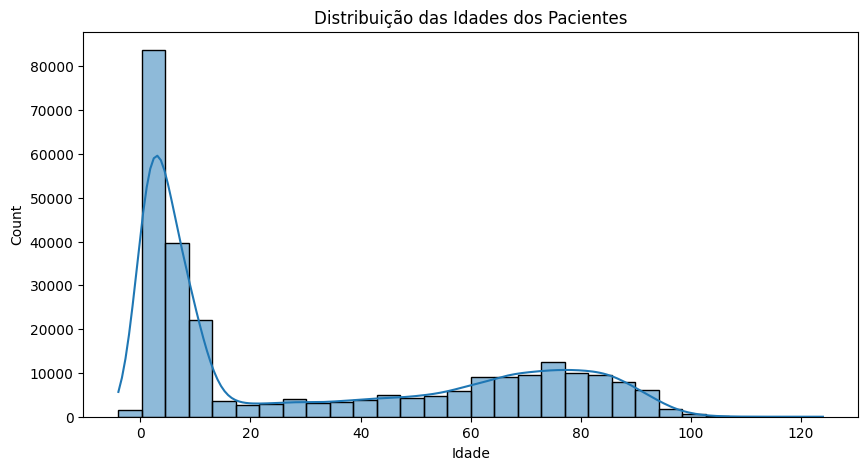

In [52]:
# Exemplo: Idade dos pacientes
if 'NU_IDADE_N' in df.columns:
    plt.figure(figsize=(10,5))
    sns.histplot(df['NU_IDADE_N'], bins=30, kde=True)
    plt.title("Distribuição das Idades dos Pacientes")
    plt.xlabel("Idade")
    plt.show()

## Tratamento de Dados


In [53]:
# Remover colunas com mais de 50% de valores nulos
threshold = 0.5
df = df[df.columns[df.isnull().mean() < threshold]]

In [54]:
# Preencher valores nulos com a moda para colunas categóricas
for col in df.select_dtypes(include=['object']).columns:
    df[col].fillna(df[col].mode()[0], inplace=True)

<ipython-input-54-b65b111bca7b>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0], inplace=True)
<ipython-input-54-b65b111bca7b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col].fillna(df[col].mode()[0], inplace=True)


In [55]:
# Preencher valores nulos com a mediana para colunas numéricas
for col in df.select_dtypes(include=['number']).columns:
    df[col].fillna(df[col].median(), inplace=True)

<ipython-input-55-334a3fef40f1>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)
<ipython-input-55-334a3fef40f1>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col].fillna(df[col].median(), inplace=True)


In [56]:
#imprimindo df - apos tratamento

df

,DT_NOTIFIC,SEM_NOT,DT_SIN_PRI,SEM_PRI,SG_UF_NOT,ID_REGIONA,CO_REGIONA,ID_MUNICIP,CO_MUN_NOT,ID_UNIDADE,...,PERD_PALA,TOMO_RES,RES_AN,ESTRANG,VACINA_COV,FNT_IN_COV,TRAT_COV,CO_DETEC,REINF,CASO_SRAG
0,04/01/2024,1,04/01/2024,1,CE,1 CRES FORTALEZA,1519.0,FORTALEZA,230440,SOPAI HOSPITAL INFANTIL,...,1.0,6.0,5.0,2.0,2.0,2,2.0,2.0,2,1.0
1,15/01/2024,3,31/12/2023,1,BA,NUCLEO REGIONAL DE SAUDE LESTE,1380.0,SALVADOR,292740,CARDIO PULMONAR DA BAHIA,...,2.0,1.0,1.0,2.0,1.0,2,1.0,9.0,2,1.0
2,15/01/2024,3,10/01/2024,2,PB,I NRS JOAO PESSOA,1377.0,JOAO PESSOA,250750,HOSPITAL DE EMERGENCIA E TRAUMA SENADOR HUMBER...,...,2.0,9.0,1.0,2.0,2.0,2,2.0,2.0,2,0.0
3,11/01/2024,2,04/01/2024,1,GO,SUDOESTE II,1800.0,JATAI,521190,HOSPITAL PADRE TIAGO NA PROVIDENCIA DE DEUS,...,2.0,1.0,2.0,2.0,1.0,2,2.0,2.0,2,0.0
4,16/01/2024,3,14/01/2024,3,BA,NUCLEO REGIONAL DE SAUDE LESTE,1380.0,SALVADOR,292740,PA MARIA DA CONCEICAO SANTIAGO IMBASSAY,...,2.0,6.0,2.0,2.0,2.0,2,2.0,9.0,2,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
266425,27/11/2024,48,23/11/2024,47,MG,BELO HORIZONTE,1449.0,BELO HORIZONTE,310620,HOSPITAL INFANTIL JOAO PAULO II,...,2.0,6.0,2.0,2.0,1.0,2,2.0,2.0,2,1.0
266426,06/12/2024,49,04/12/2024,49,MG,GOVERNADOR VALADARES,1471.0,GOVERNADOR VALADARES,312770,HOSPITAL MUNICIPAL,...,2.0,6.0,2.0,2.0,2.0,2,2.0,2.0,2,1.0
266427,16/12/2024,51,13/12/2024,50,SP,GVE XXXI SOROCABA,1353.0,ITU,352390,VIGILANCIA EPIDEMIOLOGICA,...,2.0,6.0,5.0,2.0,2.0,2,2.0,2.0,2,1.0
266428,05/12/2024,49,04/12/2024,49,DF,GVE I CAPITAL,1449.0,BRASILIA,530010,HOSPITAL AGUAS CLARAS,...,2.0,6.0,2.0,2.0,2.0,2,2.0,2.0,2,1.0
